In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def myline(x, a=1.0, b=1.0):
    return x * a + b

def err(y, y_hat):
    return y - y_hat

def brute(x, y):
    a = 1.0
    b = 1.0
    y_hat = a * x + b
    while y - y_hat > 2:
        a = a + x
        b = b + 1
        y_hat = a * x + b
    return a, b

def back_prop(x, y, a = 1.0, b = 1.0):
    y_hat = a * x + b
    err = y - y_hat
    a = a + x * err
    b = b + 1 * err
    return a, b

def sqerr(tgt, model):    # tgt: 정답 model: 예측값
    return ((tgt-model)**2).sum()

def msqerr(tgt, model):    # tgt: 정답 model: 예측값
    return ((tgt-model)**2).mean()

def rsq(tgt, model):    # r2_score
    return 1 - sqerr(tgt, model) / sqerr(tgt, tgt.mean())

In [5]:
# x = load_diabetes()
# print(x['DESCR'])

X, y = load_diabetes(return_X_y=True)

X = X[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

train_score:  0.3322712894001999
train_r2:  0.3322712894001999
train_rsq:  0.3322712894001999
[950.49561372] 152.91978688616442


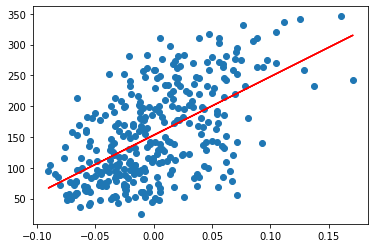

In [35]:
m = LinearRegression().fit(X_train[:,np.newaxis], y_train)
train_score = m.score(X_train[:,np.newaxis], y_train)
train_r2 = r2_score(y_train, m.predict(X_train[:,np.newaxis]))
train_rsq = rsq(y_train, myline(X_train, m.coef_, m.intercept_))
print('train_score: ', train_score)
print('train_r2: ', train_r2)
print('train_rsq: ', train_rsq)
print(m.coef_, m.intercept_)    # 기울기, 절편

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.plot(X_train, X_train * m.coef_ + m.intercept_, c='r')

a:  502.3936204502526 b:  86.81319134728514


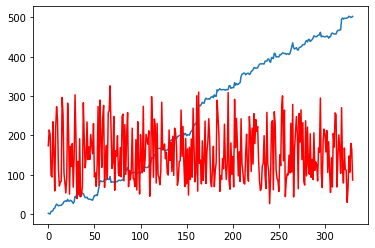

In [22]:
a = 1.0
b = 1.0
hist_a=[]
hist_b=[]
for x_i, y_i in zip(X_train, y_train):
    a, b = back_prop(x_i, y_i, a, b)
    hist_a.append(a)
    hist_b.append(b)
print('a: ', a, 'b: ', b)

_, axe = plt.subplots()
axe.plot(hist_a)
axe.plot(hist_b, c='r')

a:  1008.7356742658459 b:  99.78460354300657


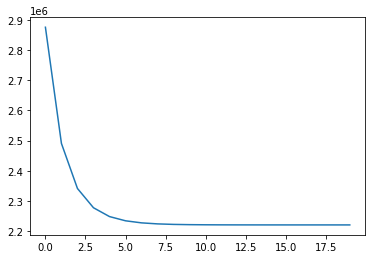

In [36]:
a = 1.0
b = 1.0
hist_a=[]
hist_b=[]
hist_sqerr=[]

for i in range(0, 20):       # epoch, 에포크/에폭
    for x_i, y_i in zip(X_train, y_train):
        a, b = back_prop(x_i, y_i, a, b)
    hist_a.append(a)
    hist_b.append(b)
    hist_sqerr.append(sqerr(y_train, myline(X_train, a, b)))
print('a: ', a, 'b: ', b)

_, axe = plt.subplots()
# axe.plot(hist_a)
# axe.plot(hist_b, c='r')
axe.plot(hist_sqerr)

train_score:  0.3250184942790538
train_r2:  0.3250184942790538
train_rsq:  0.3250184942790538
[810.06766353] [152.96991034]


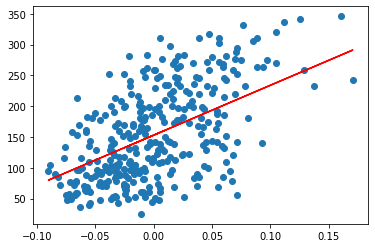

In [40]:
from sklearn.linear_model import SGDRegressor    
#  Stochastic Gradient Decent (Gradient Decent, 경사하강법)

m = SGDRegressor(max_iter=10000).fit(X_train[:, np.newaxis], y_train)
train_score = m.score(X_train[:,np.newaxis], y_train)
train_r2 = r2_score(y_train, m.predict(X_train[:,np.newaxis]))
train_rsq = rsq(y_train, myline(X_train, m.coef_, m.intercept_))
print('train_score: ', train_score)
print('train_r2: ', train_r2)
print('train_rsq: ', train_rsq)
print(m.coef_, m.intercept_)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.plot(X_train, X_train * m.coef_ + m.intercept_, c='r')

In [48]:
X, y = load_diabetes(return_X_y=True)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

m = LinearRegression().fit(X_train, y_train)
print('train score: ', r2_score(y_train, m.predict(X_train)))
print('test score: ', r2_score(y_test, m.predict(X_test)))

print(m.coef_)
print(m.intercept_)

(442, 10)
train score:  0.5112345828164674
test score:  0.5282320385429604
[   6.7924784  -224.39685223  505.73935978  319.35318609 -776.39893593
  396.87458108  132.80380166  308.91529418  689.37659909   53.89074748]
151.79831831053397


In [50]:
from sklearn.linear_model import Ridge, Lasso

print('Ridge')
m = Ridge(alpha=0.5).fit(X_train, y_train)      # L2 norm
print('train score: ', r2_score(y_train, m.predict(X_train)))
print('test score: ', r2_score(y_test, m.predict(X_test)))


print('Lasso') 
m = Lasso(alpha=0.5).fit(X_train, y_train)      # L1 norm
print('train score: ', r2_score(y_train, m.predict(X_train)))
print('test score: ', r2_score(y_test, m.predict(X_test)))

Ridge
train score:  0.4703972441345672
test score:  0.46563771536613385
Lasso
train score:  0.448609062980305
test score:  0.46230756174688736
